In [1]:
import model_archit


import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
# import torchvision
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
 

Using cpu device


In [37]:
class dataset(Dataset):
    def __init__(self,data,labels)->None:
        self.x = torch.reshape(data,(-1,1,28,28))
        self.y= F.one_hot(labels,10).float()
        try:
            self.len = len(labels)
        except:    
            self.len = labels.shape[0]

    def __getitem__(self,index):
        return self.x[index],self.y[index]

    def __len__(self):
        return self.len

In [3]:
df = pd.read_csv('./data/train.csv')

In [4]:
labels = torch.tensor(df['label'])


In [5]:
data = torch.zeros(42000, 784)
for i, _ in enumerate(labels):
    if i % 10000 == 0:
        print(f"{i}th datapoint")
    data[i]= torch.tensor(df.iloc[i, 1:785])

data = torch.reshape(data, (42000,28,28))



0th datapoint
10000th datapoint
20000th datapoint
30000th datapoint
40000th datapoint


In [6]:
train_data = data
del df

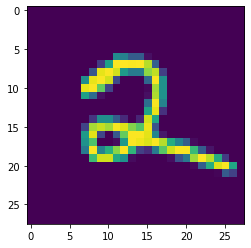

In [7]:
sample_image=train_data[41000]
plt.imshow(sample_image)


In [39]:
for i,image in enumerate(train_data):
    train_data[i] = image/torch.max(image)

In [68]:
model = model_archit.model()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
loss_list=[]
one_hot_labels = F.one_hot(labels,10).float()


In [ ]:
print(train_data.shape)
print(one_hot_labels.shape)

torch.Size([42000, 784])
torch.Size([42000, 10])


In [69]:
loss_list=[]
for epoch in range(10):
    for i,(image, label) in enumerate(zip(train_data,one_hot_labels)):
        loss_minilist=[]
        image = torch.reshape(image,(1,1,28,28))
        pred=model(image)
        loss=loss_fn(pred,label)
        loss.backward()
        loss_minilist.append(loss.detach().numpy())
        if i%64==0:
            loss_list.append(np.mean(loss_minilist))
            loss_minilist=[]
            optimizer.step()
            optimizer.zero_grad()
        if i%5000==0:
            print(f'loss is {loss_list[-1]}')
    print(f'epoch {epoch} completed ----------------')
        
plt.plot(loss_list)


loss is 0.09112943708896637
loss is 0.08953266590833664
loss is 0.0909324362874031
loss is 0.0894278809428215
loss is 0.0907786563038826
loss is 0.09070511162281036
loss is 0.08843310922384262
loss is 0.09057916700839996
loss is 0.09052066504955292
loss is 0.09049549698829651
loss is 0.08981886506080627
loss is 0.09039696305990219
loss is 0.08977614343166351
loss is 0.09034658968448639
loss is 0.09031669795513153
loss is 0.08882351219654083
loss is 0.09025737643241882
loss is 0.09024468809366226
loss is 0.09023409336805344
loss is 0.0901910662651062


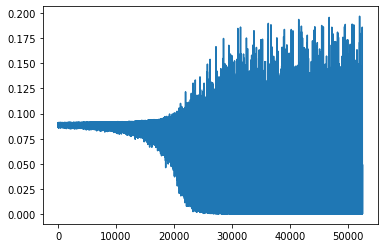

In [24]:
x.shape

torch.Size([2, 2])

tensor([[[1., 1.],
         [1., 1.]]])

In [ ]:
mode(image)
model.output

2

In [ ]:
new_list = [np.mean(loss_list[100*x:100*x+100]) for x in range(len(loss_list)//100) ]

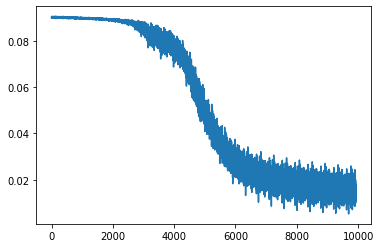

In [ ]:
plt.plot(new_list)

In [ ]:
model.eval(image)

TypeError: eval() takes 1 positional argument but 2 were given